#### Building Models

#### Steps
1. Employ cross-validation & hyper parameter tuning to determine the optimal regression model.
2. Construct the food delivery prediction model using the identified best model.
3. Evaluate the model's performance on the testing data to assess its accuracy and reliability.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import xgboost as xgb

import joblib


warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('..\Data\encoded_final_data.csv')

In [3]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0.000000,1.000000,2.000000,3.000000,4.000000
Delivery_person_Age,37.000000,34.000000,23.000000,38.000000,32.000000
Delivery_person_Ratings,4.900000,4.500000,4.400000,4.700000,4.600000
Restaurant_latitude,22.745049,12.913041,12.914264,11.003669,12.972793
Restaurant_longitude,75.892471,77.683237,77.678400,76.976494,80.249982
Delivery_location_latitude,22.765049,13.043041,12.924264,11.053669,13.012793
Delivery_location_longitude,75.912471,77.813237,77.688400,77.026494,80.289982
Weather_conditions,4.000000,3.000000,2.000000,4.000000,0.000000
Road_traffic_density,0.000000,1.000000,2.000000,3.000000,0.000000
Vehicle_condition,2.000000,2.000000,0.000000,0.000000,1.000000


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.shape

(45593, 21)

In [6]:
X=df.drop(["Time_taken(min)"],axis=1)
y=df["Time_taken(min)"]

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

In [8]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [9]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(34194, 20) (34194,)
(11399, 20) (11399,)


In [10]:
# Hyperparameter tuning
models = [
    LinearRegression(),
    ElasticNet(),
    KNeighborsRegressor()
]

param_grid = [
    {},  
    {
        'alpha':[0.1,0.01,0.011,0.19,0.02,0.09,0.25,0.5,1,5,10,50,100],
        'l1_ratio':[0,.1, .5, .7, .9, .95, .99, 1]
    },
    {
        'n_neighbors':[3,5,7,9]
    }
]

for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[i],refit=True, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    y_pred=grid_search.predict(X_test)
    RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
    r2score=r2_score(y_test,y_pred)
    print(f"{model.__class__.__name__}:")
    print("Best parameters:", grid_search.best_params_)
    print("Best RMSE:",RMSE)
    print("Best R2 score:", grid_search.best_score_)
    print()

LinearRegression:
Best parameters: {}
Best RMSE: 7.193329757933922
Best R2 score: 0.4218103243334192

ElasticNet:
Best parameters: {'alpha': 0.02, 'l1_ratio': 1}
Best RMSE: 7.193392291561537
Best R2 score: 0.421899166453145

KNeighborsRegressor:
Best parameters: {'n_neighbors': 9}
Best RMSE: 6.5694255381373035
Best R2 score: 0.5072029546599722



In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

In [12]:

# Hyperparameter tuning
models = [
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    xgb.XGBRegressor(),
]

param_grid = [
    {'max_depth': [3, 5, 7]},
    {'n_estimators': [100, 200, 300]},
    {'learning_rate': [0.1,0.2, 0.6],'n_estimators':np.arange(100,301,100)},
    {'learning_rate': [0.2, 0.6],'n_estimators': [20, 25, 30], 'max_depth': [5, 7, 9]},
]

for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[i],refit=True, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    y_pred=grid_search.predict(X_test)
    RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
    r2score=r2_score(y_test,y_pred)
    print(f"{model.__class__.__name__}:")
    print("Best parameters:", grid_search.best_params_)
    print("Best RMSE:",RMSE)
    print("Best R2 score:", grid_search.best_score_)
    print()

DecisionTreeRegressor:
Best parameters: {'max_depth': 7}
Best RMSE: 4.924971136834345
Best R2 score: 0.7270346325053172

RandomForestRegressor:
Best parameters: {'n_estimators': 300}
Best RMSE: 4.02364690162811
Best R2 score: 0.816536927869954

GradientBoostingRegressor:
Best parameters: {'learning_rate': 0.2, 'n_estimators': 300}
Best RMSE: 4.370595899752656
Best R2 score: 0.7883800990107231

XGBRegressor:
Best parameters: {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 25}
Best RMSE: 3.9782292365458214
Best R2 score: 0.8227598999870456



#### Model build

In [13]:
XGBR_model=xgb.XGBRegressor(learning_rate=0.2,max_depth=9,n_estimators=25)
XGBR_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=25, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### Feature important

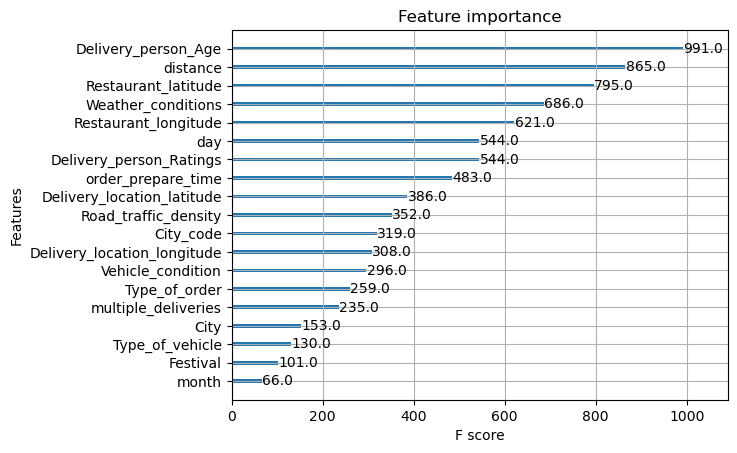

In [14]:
xgb.plot_importance(XGBR_model)
plt.show()

In [15]:
feature_important = XGBR_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)

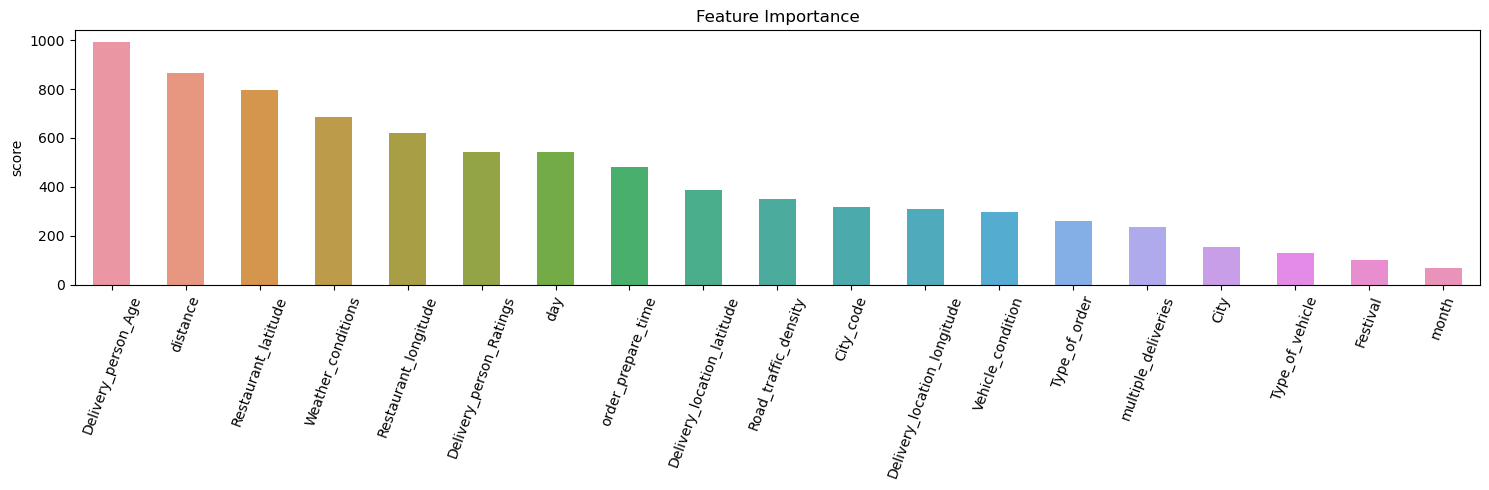

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x=data.index,y=data['score'],width=0.5)
plt.tick_params(axis='x',rotation=70)
plt.title("Feature Importance")
plt.tight_layout()

#### Save Model with joblib


In [17]:
joblib.dump(value=XGBR_model,filename="..\model_store\XGBR_model.joblib")

['..\\model_store\\XGBR_model.joblib']

#### Load model

In [18]:
final_model=joblib.load("..\model_store\XGBR_model.joblib")

### Model Evaluation

In [19]:
# Make predictions on the test data
y_pred = final_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))

Mean Absolute Error (MAE): 3.13
Mean Squared Error (MSE): 15.83
Root Mean Squared Error (RMSE): 3.98
R-squared (R2) Score: 0.82


#### Conclusion

**In conclusion, the food delivery prediction model was developed using XGBoost, achieving an impressive R2 score of 0.82. Moving forward, potential enhancements include identifying the best features, conducting additional feature engineering, and exploring other optimization techniques to further improve the model's performance and accuracy. These steps will contribute to fine-tuning the model and unlocking its full potential in predicting food delivery timings accurately.**

#### Interprete model prediction with LIME

In [20]:
# import lime package
import lime
from lime import lime_tabular

In [21]:
# create explainer/interpreter
interpreter=lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='regression'
)

#### Select  5th record

In [22]:
exp=interpreter.explain_instance(
    data_row=X_test.iloc[4],
    predict_fn=final_model.predict
    
)
exp.show_in_notebook(show_table=True)

In [23]:
exp.as_list()

[('Festival <= 0.00', -5.735016483367503),
 ('City <= 0.00', -5.040823132546879),
 ('Road_traffic_density <= 1.00', 4.478610846035905),
 ('distance > 13.75', 3.6171941246571477),
 ('3.00 < Weather_conditions <= 4.00', -3.4848068810783785),
 ('25.00 < Delivery_person_Age <= 30.00', -3.2327091954705773),
 ('4.60 < Delivery_person_Ratings <= 4.70', -3.2175738282831725),
 ('1.00 < Vehicle_condition <= 2.00', -1.557385054478519),
 ('Delivery_location_latitude <= 12.99', 0.6153878561160653),
 ('10.00 < order_prepare_time <= 15.00', -0.5275542377022573)]

#### Select  6th record

In [24]:
exp=interpreter.explain_instance(
    data_row=X_test.iloc[5],
    predict_fn=final_model.predict
    
)
exp.show_in_notebook(show_table=True,)

In [25]:
exp.as_list()

[('Delivery_person_Ratings <= 4.60', 5.568416352866381),
 ('City > 0.00', 4.662669220970286),
 ('Road_traffic_density <= 1.00', 3.9001937942236844),
 ('Vehicle_condition <= 0.00', 3.8239191908029198),
 ('4.65 < distance <= 9.30', -3.6583514668606014),
 ('Festival <= 0.00', -3.533529563564797),
 ('30.00 < Delivery_person_Age <= 35.00', 3.2357729858195934),
 ('Weather_conditions <= 1.00', 2.070464691137089),
 ('order_prepare_time <= 5.00', 1.39138490868895),
 ('6.00 < City_code <= 11.00', -0.28522392930192575)]